# 1. Decision Trees and Naive bayes

## Decision Trees
Decision trees are a non-parametric supervised machine learning method used for classification and regression. they learn to predict the target value by learning rules. these rules are based on the given features. For exampleif you want to determine if someone has a sever risk of getting diabetes you could do the following: if blood glucose level is high then YES, else NO.

#### Advantages:
* Simple to understand and to interpret. The tree can be visualized.
* Doesn't require much data preparation, regarding normalization, dummy variables etc.
* The cost of using the tree is logarithmic in the number of datapoints, thus it is rather quick.
* Possible to validate a model using tests.

#### Disadvantages:
* Can create over-complex trees that do not generalize data well. Thus, overfitting is a big issue with trees, especially with high-dimensional data.
* Can be unstable, because small variations in data might result in completely different trees. That is why an ensemble is popular.
* Decision trees create biased trees if some classes dominate. Therefore, class-balancing is very important. This can be done using over- under-sampling and other techniques.

#### Tips on practical use
* As decision trees tend to overfit with a large number of features, make sure to getting the right ratio of samples to features.
* Consider performing dimensionality reduction.
* Consider creating another model that doesn't overfit for feature selection purposes.
* Tune max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, min_impurity_decrease.

# Naive bayes
Naive bayes are methods based on Bayes' theorem with the assumption of conditional independence between every pair of features given the value of a class variable.

Advantages:
- Tends to work really well in real-world situations.
- Can be very fast.
- Requires a small amount of training data.
- If the dataset does not fit into memory, some types can use the `partial_fit` method.

Disadvantages:
- Although it is a decent classifier, it is known as a bad estimator. Therefore the probabilities from `predict_proba` are not used normally.

Types of classifiers offered by scikit-learn:
- `GaussianNB` uses the Gaussian Naive Bayes algorithm for classification. It assumes that the likelihood of the features is Gaussian.
- `MultinomialNB` is used for multinomially distributed data.
- `ComplementNB` implements the complement naive Bayes algorithm. It is an adaptation of the mulltinomial naive bayes and is suitable for imbalanced data sets.
- `BernoulliNB` assumes that data is distributed according to multivariate Bernoulli distributions. Thus, it requires binary-valued variables.
- `CategoricalNB` implements naive Bayes for categorically distributed data. It assumes that each feature has its own categorical distribution.

For an extensive description, make sure to read the <a href="https://scikit-learn.org/stable/modules/naive_bayes.html" target="_blank">docs</a>.

## Decision tree example

In [2]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

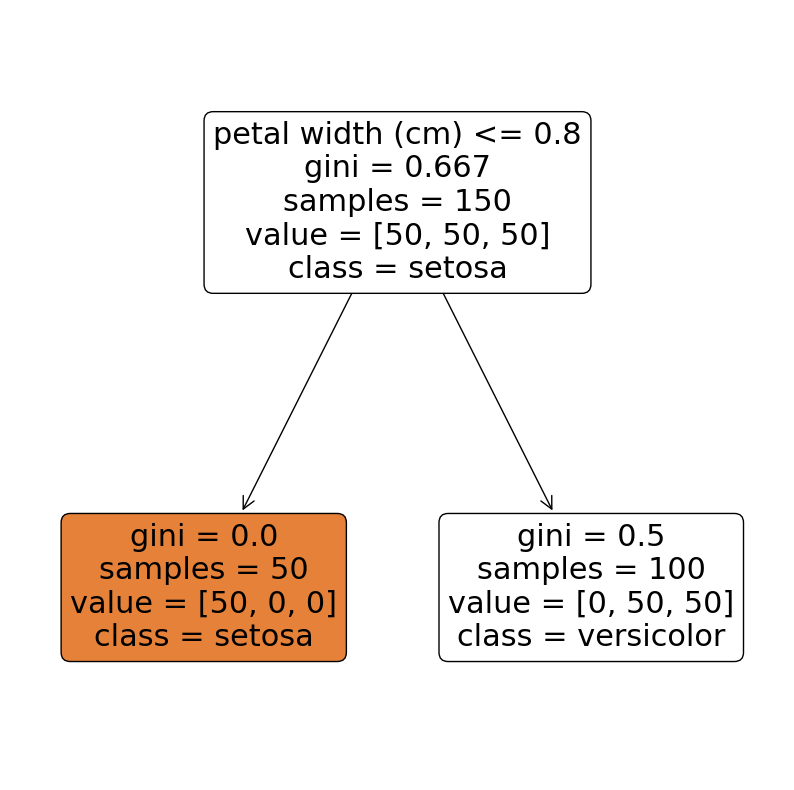

In [12]:
iris = load_iris()
X, y = iris.data, iris.target

# this is for demonstration, always split for generalizability.
dt = tree.DecisionTreeClassifier(max_depth=1)
dt.fit(X, y)
plt.figure(figsize=(10, 10))
tree.plot_tree(
    dt, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    filled=True,
    rounded=True,
)
plt.show()

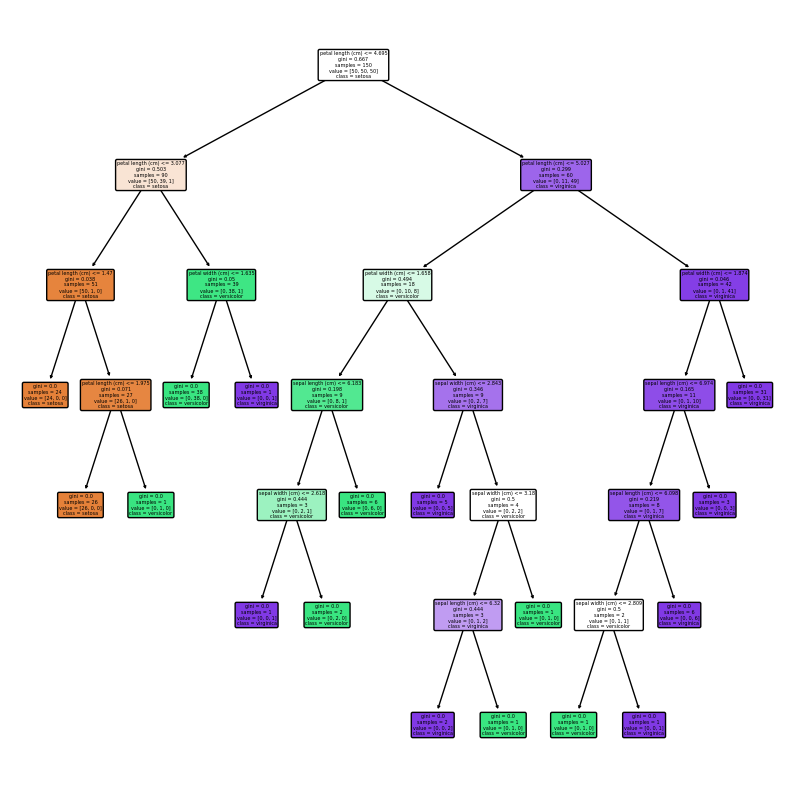

In [24]:
iris = load_iris()
X, y = iris.data, iris.target

# this is for demonstration, always split for generalizability.
dt = tree.DecisionTreeClassifier(max_depth=69, splitter='random')
dt.fit(X, y)
plt.figure(figsize=(10, 10))
tree.plot_tree(
    dt, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    filled=True,
    rounded=True,
)
plt.show()

# 2. Decision Tree Evaluation

## 1 Try to understand the dataset globally

Looking at the data i see that there are samples of malignant and benign. Each sample of malignant and benign cancers have 30 features describing them.

## 2 Load the data


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('data/breast-cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 3 Exploratory analysis


## 4 Preprocess data(skewness, normality)

## 5 Modeling (cross-validation and training)

## 6 Evaluation 

## 7 Explanation

# 3. Naive Bayes
it is usefull to include the roommate column to see how many roomates there are. also we can calculate what is their likelihood to get sick.

In [72]:
import numpy as np
from collections import Counter
data = [
        [1, 'Y', 'N', 'No', 'Negative'],
        [2, 'N', 'N', 'Mild', 'Negative'],
        [3, 'Y', 'Y', 'No', 'Positive'],
        [4, 'N', 'Y', 'No', 'Negative'],
        [5, 'N', 'N', 'Heavy', 'Positive'],
        [6, 'Y', 'N', 'No', 'Negative'],
        [7, 'Y', 'Y', 'Mild', 'Positive'],
       ]
data = np.array(data)

In [73]:
for index, headache in enumerate(data.T[3]):
    if headache == 'No':  
        data.T[3][index] = 'N'
    if headache != 'No':
        data.T[3][index] = 'Y'
    


In [74]:
list_of_counts = []
for column in data.T[1:]:
    list_of_counts.append(Counter(column))
list_of_counts

[Counter({'Y': 4, 'N': 3}),
 Counter({'N': 4, 'Y': 3}),
 Counter({'N': 4, 'Y': 3}),
 Counter({'Negative': 4, 'Positive': 3})]

In [81]:
positive = []
negative = []
for i in list_of_counts:
    for j in i.items():
        if j[0] == 'Y' or j[0] == 'Positive':
            positive.append(j[1])
        if j[0] == 'N' or j[0] == 'Negative':
            negative.append(j[1])   

In [92]:
n = data.shape[0]
likelihood_positive = 0 
for i in positive:
    if likelihood_positive * (i/n) == 0:
        likelihood_positive = i/n
    else:
        likelihood_positive *= (i/n)
likelihood_negative = 0 
for i in negative:
    if likelihood_negative * (i/n) == 0:
        likelihood_negative = i/n
    else:
        likelihood_negative *= (i/n)
print(likelihood_positive)
print(likelihood_negative)


0.04498125780924613
0.07996668054977091


In [93]:
probability_yes =  likelihood_positive/(likelihood_positive + likelihood_negative)
probability_no = likelihood_negative/(likelihood_positive + likelihood_negative)
print(probability_yes)
print(probability_no)

0.36
0.64
